## Some Simple Topic Analysis Network Vis with Python, a Topic GUI (running Mallet), Excel, Gephi

### By Lynn Cherny (@arnicas) (March, 2015) for PyLadies Boston

Topic modeling (sometimes known by the technical description LDA -- for "latent dirichlet allocation") is a statistical method for exploring the words in document collections and document relationships to one another via those words. In topic modeling, a topic is inferred from documents as a collection of likely words that are found in those documents. Some documents may be associated strongly with some topics and less strongly with others.   Here's an overview borrowed from this [presentation](http://www.slideshare.net/vitomirkovanovic/topic-modeling-for-learning-analytics-researchers-lak15-tutorial?utm_content=buffer89b5f&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer):

<img src="images/goal_topic_modeling.png">

For instance, a news article about a Chinese soccer team might be loosely associated with a topic that includes words about Chinese politics, but more strongly associated with a topic that includes words about sports and soccer. Documents with similar vocabularies (content) will generally end up associated with similar topics, because the topics are constructed out of the observed frequencies of words in the documents.

There are a lot of more technical introductions to this topic, but this is meant to be a short talk illustrating the easiest way to get visual results without a lot of coding.

We'll be using some chapters of well-known books from the [Gutenberg Project](https://www.gutenberg.org/) as well as some excerpts from modern best-sellers: **Twilight (Stephanie Meyer), Fifty Shades of Gray (EL James)**, and **The DaVinci Code** and **Angels and Demons (both by Dan Brown)**.  (The others are **Jane Austen's Pride and Prejudice** and **Sense and Sensibility, JM Barrie's Peter Pan, Joseph Conrad's The Secret Agent, AC Doyle's Sherlock Holmes stories, George Eliot's Middlemarch, Grimm's Fairytales, CS Lewis's The Lion, the Witch, and the Wardrobe,** and **RL Stevenson's Treasure Island.**)  I picked these since we'd expect to be able to see patterns in their content across both chapters and authors, but we might also learn something interesting, too.

#### Verify the contents of the data folder we'll be using: 

In [2]:
ls data/mixed_chapters/

austen_pride_ch1.txt          brown_davinci_ch77.txt        grimms_hanselgretel.txt
austen_pride_ch2.txt          brown_davinci_ch92.txt        grimms_snowdrop.txt
austen_pride_ch40.txt         conrad_secret_ch1.txt         grimms_wateroflife.txt
austen_pride_ch50.txt         conrad_secret_ch2.txt         lewis_lionwitch_ch1.txt
austen_sense_ch1.txt          doyle_caseofidentity.txt      lewis_lionwitch_ch12.txt
austen_sense_ch2.txt          doyle_redheadedleague.txt     lewis_lionwitch_ch14.txt
austen_sense_ch27.txt         doyle_scandalbohemia.txt      lewis_lionwitch_ch2.txt
austen_sense_ch41.txt         eliot_middlemarch_ch1.txt     meyer_twilight_ch1.txt
barrie_peterpan_ch1.txt       eliot_middlemarch_ch2.txt     meyer_twilight_ch15.txt
barrie_peterpan_ch15.txt      eliot_middlemarch_ch48.txt    meyer_twilight_ch2.txt
barrie_peterpan_ch2.txt       eliot_middlemarch_ch73.txt    meyer_twilight_ch21.txt
brown_angels_ch1.txt          eljames_fiftyshades_ch1.txt   stevenson_treasure_ch

*Alert: If you're on a Mac, check for a .DS_Store file here and delete it if you can before running the topic modeler.*

The topic tool GUI we will use is available in this repo (and duplicated in my github repo, but it may not run for you without a fresh download, especially on Windows): https://code.google.com/p/topic-modeling-tool/.  This tool runs a GUI wrapper around [mallet](http://mallet.cs.umass.edu/), a state-of-the-art command line tool for topic modeling. After you've done this exercise, you can try running it without the GUI and exploring the other options in that package.

Download it if you don't have it already.  The tool will be called **TopicModelingTool.jar.**

Create a directory for output files, called **topic_output,** for example.  Doubleclick on the jar file to run it. Select the input directory **data/mixed_chapters** and the output directory you created. Click on **Advanced...** and change the settings to match.


#### It should look something like this:
<img src="images/topicModelingTool_advanced.png">

Run it by clicking "Learn Topics." Look at the 2 folders that have appeared in your ouput directory (e.g., topic_output), if this ran correctly:

* output_csv
* output_html

If you want to browse around the output produced in the HTML folder, feel free (click on the _all_topics.html_ file to load it in a browser). **NB: You will probably see slightly different results... LDA training is non-deterministic and the element of randomness may lead to different results.**  But they will probably nevertheless be comparable; I've run several times on this data and gotten similar results each time.  For instance, with 12 topics, here is one set of results:

<img src="images/topicModeling_allTopicsHTML.png">

Each topic is described by ten words associated with the documents in that topic. When you click on a topic, you can see some of the documents and the matching score for each:

<img src="images/topicModeling_docsInTopic.png">

And if you click on a document, you can see how well it matches other topics in the set of topics. 

<img src="images/topicModeling_docMatches.png">

I find the HTML non-visual display kind of confusing. So we're going to make a network diagram instead. In this code, you want to set the path to your output directory for the csv files:


In [5]:
import csv
import collections

DIR = 'topic_output/output_csv/'
topicWords = DIR + 'Topics_Words.csv'
topicDocs = DIR + 'TopicsInDocs.csv'
docsTopics = DIR + 'DocsInTopics.csv'


In [7]:

# This will give you the 10 words per topic; we asked for 12 topics

def list_words_for_topics(filename):
    """ Expects the Topics_Words csv file."""
    words = {}
    with open(filename, 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for index, row in enumerate(reader):
            if index > 0:  # skip first row
                words[row[0]] = [x.strip() for x in row[1].split() if len(x.strip())>0]
                print row
    return words

In [8]:
word_list = list_words_for_topics(topicWords)
len(word_list)  # you will have as many as topics you requested - so, 12.

['1', 'holmes mr man street matter heard business case face red']
['2', 'langdon man felt word gettum sophie religious teabing city curator']
['3', 'didn looked asked edward couldn wasn eyes walked made hair']
['4', 'dorothea celia glass sir made casaubon man brooke snowdrop captain']
['5', 'thought cried hook woman hansel life peter father long children']
['6', 'mr verloc vladimir air sort winnie fact don women business']
['7', 'mr mrs mother elinor sister day thing dashwood bennet half']
['8', 'lucy mr looked light face began aslan peter knew great']
['9', 'time back good door hand room voice ll eyes side']
['10', 'darling mrs night wendy mr father remember mother children nana']
['11', 'make thought mind years young miss life people give place']
['12', 'don eyes grey christian feel head ve steele hands hair']


12

In [9]:
word_list['1'] # listing the words in the topic number

['holmes',
 'mr',
 'man',
 'street',
 'matter',
 'heard',
 'business',
 'case',
 'face',
 'red']

### ALERT:  The topic modeling tool will number the docs from 1, not 0 like python lists. That's why we're making dicts with keys that are strings.  Take this into account when doing mapping/reporting.

#### Let's get the filenames mapped to the document id's which are used in most of these data files. The document filename and id is found in the DocsInTopics.csv.  While we're at it, let's get the authors, too.

In [12]:
def get_names_for_ids(filename):
    """ Expects the DocsinTopics csv file."""
    
    doc_titles = {}  # dictionary, the keys will be the doc id, the filename the value
    doc_authors = {}
    with open(filename, 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for index, row in enumerate(reader):
            print row
            if index > 0:  # skip first row making the data structure
                title = row[3].split('/')[-1:][0]  # last element of the split
                author = title.split('_')[0]
                id = row[2]
                print "Parsed out ", title, author
                doc_titles[id] = title
                doc_authors[id] = author
    return doc_titles, doc_authors

In [11]:
doc_ids, doc_authors = get_names_for_ids(docsTopics)

['topicId', 'rank', 'docId', 'filename']
['1', '1', '21', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/doyle_redheadedleague.txt']
Parsed out  doyle_redheadedleague.txt doyle
['1', '2', '22', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/doyle_scandalbohemia.txt']
Parsed out  doyle_scandalbohemia.txt doyle
['1', '3', '20', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/doyle_caseofidentity.txt']
Parsed out  doyle_caseofidentity.txt doyle
['1', '4', '19', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/conrad_secret_ch2.txt']
Parsed out  conrad_secret_ch2.txt conrad
['1', '5', '23', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/eliot_middlemarch_ch1.txt']
Parsed out  eliot_middlemarch_ch1.txt eliot
['1', '6', '18', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/conrad_secret_ch1.txt']
Parsed out  conrad_secret_ch1.txt conrad
['1',

In [13]:
doc_ids['1']

'austen_pride_ch1.txt'

*Note here: If you see ".DS_Store" as a document, you need to delete that file from the directory you input to the topic modeling tool GUI and rerun that.*

In [147]:
doc_authors

{'1': 'austen',
 '10': 'barrie',
 '11': 'barrie',
 '12': 'brown',
 '13': 'brown',
 '14': 'brown',
 '15': 'brown',
 '16': 'brown',
 '17': 'brown',
 '18': 'conrad',
 '19': 'conrad',
 '2': 'austen',
 '20': 'doyle',
 '21': 'doyle',
 '22': 'doyle',
 '23': 'eliot',
 '24': 'eliot',
 '25': 'eliot',
 '26': 'eliot',
 '27': 'eljames',
 '28': 'eljames',
 '29': 'eljames',
 '3': 'austen',
 '30': 'eljames',
 '31': 'grimms',
 '32': 'grimms',
 '33': 'grimms',
 '34': 'lewis',
 '35': 'lewis',
 '36': 'lewis',
 '37': 'lewis',
 '38': 'meyer',
 '39': 'meyer',
 '4': 'austen',
 '40': 'meyer',
 '41': 'meyer',
 '42': 'stevenson',
 '43': 'stevenson',
 '5': 'austen',
 '6': 'austen',
 '7': 'austen',
 '8': 'austen',
 '9': 'barrie'}

#### One of the output files, the most useful for network drawing, is in an INSANE format where topic numbers alternate with scores for the percentage of the document matched to the topic.

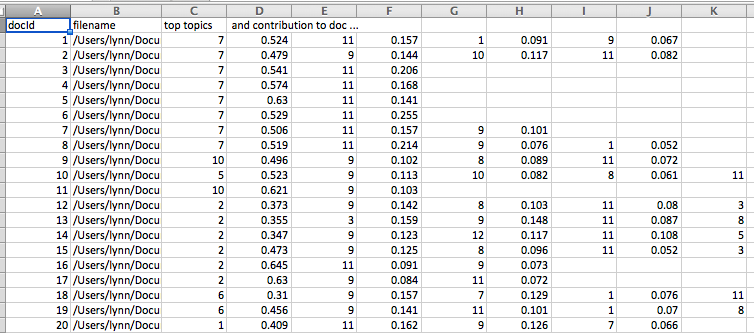

In [14]:
from IPython.core.display import Image
Image(filename="images/TopicsInDocsCSV.png")

From looking at it, we can see that some documents - like 3, 4, 5, 6 - don't have as many topics associated with them.  We used a cutoff value of .05 (5%) in the GUI when we ran the modeling, so we don't report any associations weaker than that. 

**But let's parse it nicely so we can use this in a visual.**

In [16]:
# This gets you the topic assigments and strength of association for each document and topic.

def parse_topicsDocs(filename):
    """ Filename input is the TopicsInDocs.csv file path. """
    
    docs = {}
    with open(filename, "rb") as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for index, row in enumerate(spamreader):
            if index > 0:  # skip first row
                print "row", row
                docid = row[0]
                topics = row[2:]
                topics_dict = dict(zip(topics[::2],topics[1::2]))  #alternating
                print docid, topics_dict
                docs[docid] = topics_dict
    return docs

In [17]:
docs_alltopics = parse_topicsDocs(topicDocs)

row ['1', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/austen_pride_ch1.txt', '7', '0.524', '11', '0.157', '1', '0.091', '9', '0.067']
1 {'11': '0.157', '1': '0.091', '9': '0.067', '7': '0.524'}
row ['2', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/austen_pride_ch2.txt', '7', '0.479', '9', '0.144', '10', '0.117', '11', '0.082']
2 {'9': '0.144', '10': '0.117', '7': '0.479', '11': '0.082'}
row ['3', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/austen_pride_ch40.txt', '7', '0.541', '11', '0.206']
3 {'11': '0.206', '7': '0.541'}
row ['4', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/austen_pride_ch50.txt', '7', '0.574', '11', '0.168']
4 {'11': '0.168', '7': '0.574'}
row ['5', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/austen_sense_ch1.txt', '7', '0.630', '11', '0.141']
5 {'11': '0.141', '7': '0.630'}
row ['6', '/Users/lynn/Documents/Talks/TopicNetwo

In [20]:
# This should match the first row of the spreadsheet!  Although it's not ordered the same way.

docs_alltopics['1']

{'1': '0.091', '11': '0.157', '7': '0.524', '9': '0.067'}

#### Check you have the right number of documents in your new dictionary, to match files count (note if you have .DS_Store you will have a mismatch!)

In [21]:
ls data/mixed_chapters | wc -l

      43


In [23]:
# Verify the length of the dict is the number of docs in the data directory

len(docs_alltopics)

43

In [24]:
docs_alltopics['1']  # topics and percent of words assigned to the topic for first doc

{'1': '0.091', '11': '0.157', '7': '0.524', '9': '0.067'}

## Now let's do a simple first visualization of the data in Excel.


To make a much simpler list of the data, I want to format it "long form," with a document-topic pair per row.  The filename and author are just helpful for understanding the data, and for grouping by author if we want to.

In [29]:
# Make a simple csv format we could see in Excel: doc #, topic, strength, title

def doc_topics_for_excel_table(docs_alltopics, doc_ids, doc_authors, filename):
    ''' Produce a csv of docs, topics, scores, and filename.
    
    Args:
        docs_alltopics: the output from read_doctopics
        doc_ids: document ids to filename dict
        filename: to save to
    Output:
        A csv file we can open in Excel.
    '''
    with open(filename, "w") as handle:
        print "DocID,Topic,Score,File,Author"  # first row headers for cell below
        
        handle.write("DocID,Topic,Score,File,Author\n")  # the header of the file
        for id, topics in docs_alltopics.iteritems():
            #print x, docs_alltopics[x].keys()
            for topic, score in topics.iteritems():
                #print topic, score
                print ','.join([str(id), "Topic"+str(topic), str(score), doc_ids[id], doc_authors[id]])
                handle.write(','.join([str(id), "Topic"+str(topic), str(score), doc_ids[id], doc_authors[id] + "\n"]))

In [30]:
doc_topics_for_excel_table(docs_alltopics, doc_ids, doc_authors, 'data/for_excel.csv')

DocID,Topic,Score,File,Author
42,Topic9,0.242,stevenson_treasure_ch1.txt,stevenson
42,Topic10,0.106,stevenson_treasure_ch1.txt,stevenson
42,Topic5,0.180,stevenson_treasure_ch1.txt,stevenson
42,Topic4,0.232,stevenson_treasure_ch1.txt,stevenson
42,Topic11,0.070,stevenson_treasure_ch1.txt,stevenson
43,Topic9,0.304,stevenson_treasure_ch2.txt,stevenson
43,Topic10,0.098,stevenson_treasure_ch2.txt,stevenson
43,Topic5,0.093,stevenson_treasure_ch2.txt,stevenson
43,Topic4,0.291,stevenson_treasure_ch2.txt,stevenson
43,Topic8,0.067,stevenson_treasure_ch2.txt,stevenson
24,Topic11,0.180,eliot_middlemarch_ch2.txt,eliot
24,Topic9,0.085,eliot_middlemarch_ch2.txt,eliot
24,Topic4,0.412,eliot_middlemarch_ch2.txt,eliot
24,Topic7,0.081,eliot_middlemarch_ch2.txt,eliot
24,Topic6,0.079,eliot_middlemarch_ch2.txt,eliot
25,Topic11,0.188,eliot_middlemarch_ch48.txt,eliot
25,Topic10,0.059,eliot_middlemarch_ch48.txt,eliot
25,Topic5,0.070,eliot_middlemarch_ch48.txt,eliot
25,Topic4,0.276,eliot_middlemarch_ch48.txt,elio

#### Now open that file in Excel and do some nice analysis / viewing of the topics in a pivot table!

####  In a pivot table, you can see the matrix of files and topics and scores, and sort as you like. Note that this table view will have different numbers than yours...
<img src="images/Excel_Pivot.png">

Some things are clear from this view: the Austen files are all associated strongly with the same topic numbers (7 and  11 in this picture), and not with most other topics. Topics 11 and 9 are pretty diffuse - weakly matching most of the documents.  The strength of author to topic, even across books, is remarkable for some authors, like Dan Brown, Doyle, and EL James.  But we should expect that, knowing what we know about their writing!

Let's try a network view now.  Let's generate that data...

# Network Views

One way to visualize this data is in a network - since we have relationships among a bunch of objects. 
A simple first pass is to imagine 2 node types: documents, and topics.  The links between these nodes 
are the relations of the documents to topics.  We can also scale the edge lines by the strength of the relationship to the topic.

<img src="images/simple_network.png" width="30%">

In the [Gephi network visualization tool](http://gephi.org), we can import simple nodes (the dots above) and edges, the links between them, from CSV files.  So we have to do some data munging to write those out.

In [39]:
def make_nodes_file(doc_ids, doc_authors, topic_list=None, filename='nodes.csv'):
    ''' Produce a csv of docs, topics, scores, and filename.
    
    Args:
        doc_ids: dict with document id keys to filename values
        doc_authors: dict with doc id keys to authors of docs
        topic_list (opt'l): a dict of the words for each topic, the output from list_words_for_topics
        filename: file to to save to, default nodes.csv
    Output:
        A dict of node id numbers for docs and topics, keys being 'Doc' + id or 'Topic' + id.
        This is because Gephi needs unique node id's.
    '''
    
    idNumbering = {}
    
    counter = 1
    for doc in doc_ids.keys():
        idNumbering['Doc' + doc] = counter
        counter += 1
    
    if topic_list:
        for topic in word_list:
            idNumbering['Topic' + topic] = counter
            counter += 1
                
    with open(filename, "w") as handle:
        print "Id,Label,Type,Author"  # first row headers for cell below
        handle.write("Id,Label,Type,Author\n")  # the header of the file
        for doc in doc_ids.keys():
            string = ','.join([str(idNumbering['Doc' + doc]),
                        doc_ids[doc].replace('.txt',''), 'Doc',
                        str(doc_authors[doc])])
            print string
            handle.write(string + '\n')
        if topic_list:
            for topic in word_list.keys():
                string = ','.join([str(idNumbering['Topic' + topic]),
                            ':'.join(['Topic' + topic] + word_list[topic][0:4]), 'Topic',
                            'None'])
                print string
                handle.write(string + '\n')
    
    return idNumbering

In [40]:
numbering = make_nodes_file(doc_ids, doc_authors, topic_list=word_list, filename = 'data/nodes.csv')

Id,Label,Type,Author
1,eljames_fiftyshades_ch18,Doc,eljames
2,stevenson_treasure_ch2,Doc,stevenson
3,eliot_middlemarch_ch2,Doc,eliot
4,eliot_middlemarch_ch48,Doc,eliot
5,eliot_middlemarch_ch73,Doc,eliot
6,eljames_fiftyshades_ch1,Doc,eljames
7,doyle_caseofidentity,Doc,doyle
8,doyle_redheadedleague,Doc,doyle
9,doyle_scandalbohemia,Doc,doyle
10,eliot_middlemarch_ch1,Doc,eliot
11,stevenson_treasure_ch1,Doc,stevenson
12,eljames_fiftyshades_ch2,Doc,eljames
13,meyer_twilight_ch2,Doc,meyer
14,meyer_twilight_ch21,Doc,meyer
15,austen_pride_ch1,Doc,austen
16,austen_pride_ch40,Doc,austen
17,austen_pride_ch2,Doc,austen
18,austen_sense_ch1,Doc,austen
19,austen_pride_ch50,Doc,austen
20,austen_sense_ch27,Doc,austen
21,austen_sense_ch2,Doc,austen
22,barrie_peterpan_ch1,Doc,barrie
23,austen_sense_ch41,Doc,austen
24,brown_angels_ch2_4,Doc,brown
25,brown_angels_ch1,Doc,brown
26,barrie_peterpan_ch2,Doc,barrie
27,barrie_peterpan_ch15,Doc,barrie
28,meyer_twilight_ch15,Doc,meyer
29,meyer_twilight_ch1,Doc,meye

In [42]:
def make_edge_file(doctopics, filename = 'edges.csv'):
    """ 
    Print out the edges, the links from documents to topics, with scores, as csv.
    Args:
        doctopics: the result of parse_topicsDocs
        filename: file to save result to as csv
    Output:
        None
    """

    with open(filename, 'w') as handle:
        handle.write("Source,Target,Weight\n")
        print "Source,Target,Weight"
        for doc, topics in doctopics.iteritems():
            for topic, score in topics.iteritems():
                string = ','.join([str(numbering['Doc' + str(doc)]), 
                                   str(numbering["Topic"+str(topic)]), 
                                   str(score)])
                print string
                handle.write(string + '\n')

In [43]:
make_edge_file(docs_alltopics, filename = 'data/edges.csv')

Source,Target,Weight
11,54,0.242
11,45,0.106
11,50,0.180
11,51,0.232
11,44,0.070
2,54,0.304
2,45,0.098
2,50,0.093
2,51,0.291
2,55,0.067
3,44,0.180
3,54,0.085
3,51,0.412
3,52,0.081
3,53,0.079
4,44,0.188
4,45,0.059
4,50,0.070
4,51,0.276
4,52,0.086
4,54,0.128
4,55,0.069
5,44,0.341
5,47,0.055
5,50,0.055
5,51,0.112
5,52,0.142
5,53,0.079
5,54,0.068
6,54,0.204
6,44,0.203
6,46,0.417
7,47,0.409
7,44,0.162
7,54,0.126
7,52,0.066
8,47,0.443
8,54,0.192
8,55,0.056
8,44,0.091
9,47,0.397
9,54,0.191
9,44,0.115
10,44,0.136
10,54,0.108
10,47,0.074
10,51,0.393
10,52,0.114
1,54,0.202
1,44,0.054
1,46,0.611
12,54,0.188
12,44,0.148
12,46,0.440
13,54,0.180
13,44,0.143
13,48,0.487
13,46,0.052
14,54,0.351
14,44,0.107
14,48,0.343
15,44,0.157
15,47,0.091
15,54,0.067
15,52,0.524
16,44,0.206
16,52,0.541
17,54,0.144
17,45,0.117
17,52,0.479
17,44,0.082
18,44,0.141
18,52,0.630
19,44,0.168
19,52,0.574
20,44,0.157
20,54,0.101
20,52,0.506
21,44,0.255
21,52,0.529
22,54,0.102
22,45,0.496
22,44,0.072
22,55,0.089
23,44,0.214


## Now open Gephi.

Load the nodes and edges files into Gephi.  Get the Data Table window open.

<img src='images/Gephi_ImportSpreadsheet.png'>

Load the nodes file and the edges file using the "import spreadsheet" button.

<img src='images/Gephi_ImportNodes.png'>

Don't forget the edges file too!

<img src='images/Gephi_ImportEdges.png'>

Now switch to the Overview tab to lay out your nodes and size/color things.  Use the Preview tab to make a pretty version to print. There are some helpful instructions in the [GephiToSigmaJS pdf](files/GephiToSigmaJS_Grimms.pdf) in the files directory.  When you're done, your Preview might look something like this:

<img src='images/Docs_Topics_Gephi.png' width="80%">

In the image, you can see the Austen files grouped together closely to a topic with "elinor" in it.  The EL James files are close to their topic node.  Thicker lines represent stronger ties.  You can see some strong ties crossing the entire network.

## Suppose we want a network of just the documents, removing the topics in between?  

We can do a little data munging to link documents that belong to a topic, based on a scaled average of the weights.  First, let's use the nicely formatted excel file to get a dictionary of the topics and their documents and weights:

In [45]:
from collections import defaultdict
topics = defaultdict(list)

with open('data/for_excel.csv', 'r') as handle:
    reader = csv.reader(handle)
    next(reader)  # skip the first row which is labels
    for row in reader:
        doc = row[0]
        topic = row[1]
        weight = row[2]
        topics[topic].append((doc, weight))

In [46]:
# This is a dict of topics with a list of doc-weight pairs per topic.
topics

defaultdict(<type 'list'>, {'Topic9': [('42', '0.242'), ('43', '0.304'), ('24', '0.085'), ('25', '0.128'), ('26', '0.068'), ('27', '0.204'), ('20', '0.126'), ('21', '0.192'), ('22', '0.191'), ('23', '0.108'), ('28', '0.202'), ('29', '0.188'), ('40', '0.180'), ('41', '0.351'), ('1', '0.067'), ('2', '0.144'), ('7', '0.101'), ('9', '0.102'), ('8', '0.076'), ('39', '0.236'), ('38', '0.205'), ('11', '0.103'), ('10', '0.113'), ('13', '0.148'), ('12', '0.142'), ('15', '0.125'), ('14', '0.123'), ('17', '0.084'), ('16', '0.073'), ('19', '0.141'), ('18', '0.157'), ('31', '0.212'), ('30', '0.171'), ('37', '0.185'), ('36', '0.115'), ('35', '0.181'), ('34', '0.210'), ('33', '0.128'), ('32', '0.170')], 'Topic8': [('43', '0.067'), ('25', '0.069'), ('21', '0.056'), ('9', '0.089'), ('39', '0.084'), ('38', '0.063'), ('10', '0.061'), ('13', '0.084'), ('12', '0.103'), ('15', '0.096'), ('14', '0.058'), ('19', '0.062'), ('31', '0.064'), ('37', '0.564'), ('36', '0.510'), ('35', '0.481'), ('34', '0.413')], 'T

In [47]:
topics['Topic2']

[('13', '0.355'),
 ('12', '0.373'),
 ('15', '0.473'),
 ('14', '0.347'),
 ('17', '0.630'),
 ('16', '0.645')]

We'll do a little clever data munging to make relationships between all the documents that are associated with a topic.

In [49]:
# A short way to make a set of pairs of items in a list
import itertools
pairs = [24,34,454,54]
[x for x in itertools.combinations(pairs,2)]

[(24, 34), (24, 454), (24, 54), (34, 454), (34, 54), (454, 54)]

In [51]:
# we can apply this principle to the pairs of the doc and score, too:

[x for x in itertools.combinations(topics['Topic2'],2)]

[(('13', '0.355'), ('12', '0.373')),
 (('13', '0.355'), ('15', '0.473')),
 (('13', '0.355'), ('14', '0.347')),
 (('13', '0.355'), ('17', '0.630')),
 (('13', '0.355'), ('16', '0.645')),
 (('12', '0.373'), ('15', '0.473')),
 (('12', '0.373'), ('14', '0.347')),
 (('12', '0.373'), ('17', '0.630')),
 (('12', '0.373'), ('16', '0.645')),
 (('15', '0.473'), ('14', '0.347')),
 (('15', '0.473'), ('17', '0.630')),
 (('15', '0.473'), ('16', '0.645')),
 (('14', '0.347'), ('17', '0.630')),
 (('14', '0.347'), ('16', '0.645')),
 (('17', '0.630'), ('16', '0.645'))]

#### Now let's create the edges file without the topics in the mix...  We'll also do a little dirty math to try to adjust the scores to make a variant that relates two documents to each other, based on their original relationship to the topic.

In [53]:
edgesScores = defaultdict(list)

for topic, doclist in topics.iteritems():
    # make the pairs from all the document, weight items.  First filter at whatever weight you want.
    filtered = [x for x in doclist if float(x[1]) >= .30]
    
    # filtering because there are just TOO MANY LINKS otherwise.  Trust me, I tried it first without.
    print "Topic", topic, "originally", len(doclist), "filtered to", len(filtered)
    combos = [x for x in itertools.combinations(filtered,2)]
    for pair in combos:
        #print pair
        node1 = pair[0][0]
        node2 = pair[1][0]
        weight1 = float(pair[0][1])
        weight2 = float(pair[1][1])
        if weight1 and weight2:
            # an approximation of the distance based on similarity in this topic
            if weight1 != weight2:
                weight = (1 / abs(weight1 - weight2)) / 10
            else:  # just make it high if the scores are the same
                weight = 100
            if node2 < node1:
                # swap to keep the same ordering everywhere
                node1, node2 = node2, node1
        edgesScores[(node1,node2)].append(weight)

Topic Topic9 originally 39 filtered to 2
Topic Topic8 originally 17 filtered to 4
Topic Topic1 originally 9 filtered to 3
Topic Topic3 originally 9 filtered to 4
Topic Topic2 originally 6 filtered to 6
Topic Topic5 originally 16 filtered to 4
Topic Topic4 originally 7 filtered to 3
Topic Topic7 originally 15 filtered to 8
Topic Topic6 originally 4 filtered to 2
Topic Topic11 originally 36 filtered to 1
Topic Topic10 originally 11 filtered to 2
Topic Topic12 originally 9 filtered to 4


In [54]:
list(edgesScores.iteritems())[0:2]

[(('38', '41'), [0.9009009009009009]), (('38', '39'), [0.7194244604316546])]

In [60]:

with open('data/edges2.csv', 'w') as handle:
    print 'Source,Target,Weight'
    handle.write('Source,Target,Weight\n')
    for pair, weights in edgesScores.iteritems():
        source = str(numbering['Doc' + pair[0]])
        target = str(numbering['Doc' + pair[1]])
        weight = round(sum(weights)/len(weights),2)  # avg, rounded to 2 decimal places
        print ','.join([source, target, str(weight)])
        handle.write(','.join([source, target, str(weight)]) + '\n')

Source,Target,Weight
29,14,0.9
29,28,0.72
24,32,0.36
18,23,0.9
1,37,2.56
21,20,4.35
6,12,4.35
7,8,2.94
43,42,0.31
25,24,5.56
15,21,20.0
41,39,1.03
13,14,0.69
27,43,0.53
17,20,3.7
6,1,0.52
41,40,1.47
15,17,2.22
29,13,3.03
25,31,3.85
24,33,0.34
36,42,1.12
39,38,1.85
10,3,5.26
7,9,8.33
16,23,4.55
1,12,0.58
31,33,0.34
15,23,20.0
16,18,1.12
40,38,1.2
27,42,0.78
17,23,2.5
15,18,0.94
10,43,1.59
25,30,1.0
24,30,0.85
36,43,0.44
17,19,1.05
26,22,0.8
16,21,8.33
30,33,0.58
14,2,2.13
18,20,0.81
8,9,2.17
19,21,2.22
17,16,1.61
40,39,3.45
6,37,0.65
27,36,2.5
31,32,0.35
16,19,3.03
17,21,2.0
25,33,0.37
24,31,12.5
28,13,0.58
17,18,0.66
30,32,0.64
41,38,0.66
19,23,1.82
18,21,0.99
3,43,1.22
16,20,2.86
19,20,1.47
31,30,0.79
20,23,7.69
35,34,0.68
15,16,5.88
15,20,5.56
19,18,1.79
25,32,0.39
28,14,3.57
15,19,2.0
21,23,10.0
33,32,6.67
12,37,0.76


#### Write out a new nodes files without the topics in there.  That's why it was optional!

In [61]:
numbering = make_nodes_file(doc_ids, doc_authors, filename = 'data/nodes2.csv')

Id,Label,Type,Author
1,eljames_fiftyshades_ch18,Doc,eljames
2,stevenson_treasure_ch2,Doc,stevenson
3,eliot_middlemarch_ch2,Doc,eliot
4,eliot_middlemarch_ch48,Doc,eliot
5,eliot_middlemarch_ch73,Doc,eliot
6,eljames_fiftyshades_ch1,Doc,eljames
7,doyle_caseofidentity,Doc,doyle
8,doyle_redheadedleague,Doc,doyle
9,doyle_scandalbohemia,Doc,doyle
10,eliot_middlemarch_ch1,Doc,eliot
11,stevenson_treasure_ch1,Doc,stevenson
12,eljames_fiftyshades_ch2,Doc,eljames
13,meyer_twilight_ch2,Doc,meyer
14,meyer_twilight_ch21,Doc,meyer
15,austen_pride_ch1,Doc,austen
16,austen_pride_ch40,Doc,austen
17,austen_pride_ch2,Doc,austen
18,austen_sense_ch1,Doc,austen
19,austen_pride_ch50,Doc,austen
20,austen_sense_ch27,Doc,austen
21,austen_sense_ch2,Doc,austen
22,barrie_peterpan_ch1,Doc,barrie
23,austen_sense_ch41,Doc,austen
24,brown_angels_ch2_4,Doc,brown
25,brown_angels_ch1,Doc,brown
26,barrie_peterpan_ch2,Doc,barrie
27,barrie_peterpan_ch15,Doc,barrie
28,meyer_twilight_ch15,Doc,meyer
29,meyer_twilight_ch1,Doc,meye

### The view in Gephi differs now...

After loading that into Gephi and doing some work on it, you get something like this... where, as expected, most of the chapters by the same author are linked.  There are a few interesting oddities, though!
<img src="images/Docs_Only.png" width="80%">

### More Reading/Code

For some more fun, you can run topic modeling in Python directly using Gensim (or other packages like [lda](http://pythonhosted.org/lda/)).

* A recent example of topic modeling with gensim on Shakespeare's sonnets: http://nbviewer.ipython.org/github/sgsinclair/alta/blob/master/ipynb/TopicModelling.ipynb
* A tutorial slidedeck focused mostly on R, not Python: http://www.slideshare.net/vitomirkovanovic/topic-modeling-for-learning-analytics-researchers-lak15-tutorial?utm_content=buffer89b5f&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer
* The gensim package's intro material on LDA: http://radimrehurek.com/gensim/wiki.html#latent-dirichlet-allocation
